## Loading a polarized optical microscope (POM) image

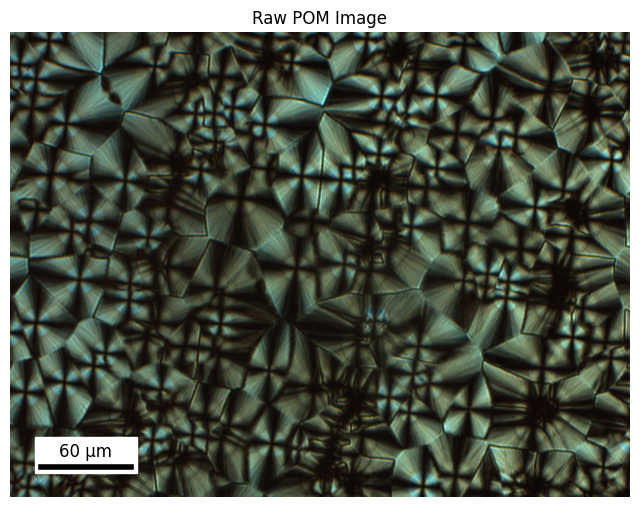

In [1]:
import sys
sys.path.append("../../src/data_loading")  # Ensure Python finds the module

import image_loader

# Define image path
image_path = "../../data/raw/S33.tif"

# Load and display the image with a scale bar
image = image_loader.load_pom_image(image_path)
image_loader.display_image_with_scale(image)


## Preprocessing the image

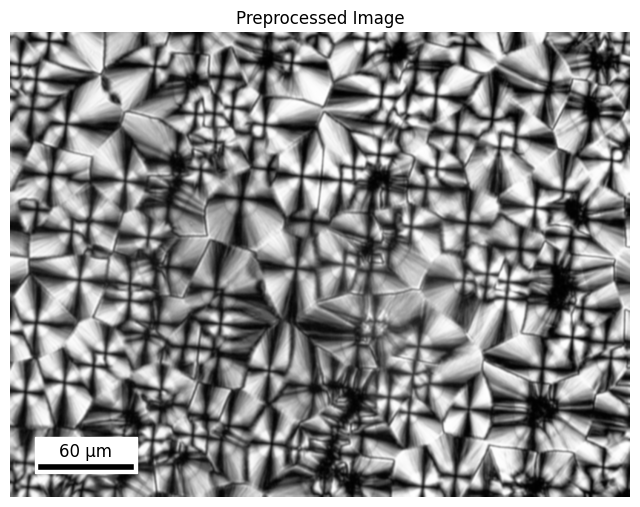

In [5]:
import sys
sys.path.append("../../src/preprocessing")  # Ensure Python finds the module

import preprocessing

# Converting the image to grayscale
preprocessed = preprocessing.GrayConverter.convert_to_gray(image)

# Applying histogram equalization
preprocessed = preprocessing.GrayConverter.equalize_histogram(preprocessed)

# Reducing noise with a Gaussian filter
preprocessed = preprocessing.apply_gaussian_blur(preprocessed)

# Display with scale bar
preprocessing.display_preprocessed_image(preprocessed)
